## Adidas sales prediction (time series)
Bu uygulamada Adidas markasına ait satış verileri zeründen geleceğe yönelik satış tahmini yapılacaktır

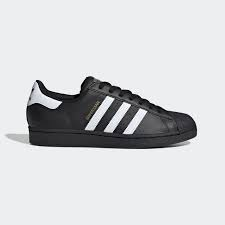

In [1]:
#Kütüphaneleri yükle-içe aktarma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Sezonluk inceleme, arima modeli ile tahmin
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [6]:
#veri setini yükle
df=pd.read_csv('adidas-quarterly-sales.csv')
df

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558
...,...,...
83,2020Q4,5142
84,2021Q1,5268
85,2021Q2,5077
86,2021Q3,5752


In [16]:
#interakitif veri görseleştirme
import plotly.express as px
fig=px.line(df,x='Time Period',y='Revenue')
fig.show()

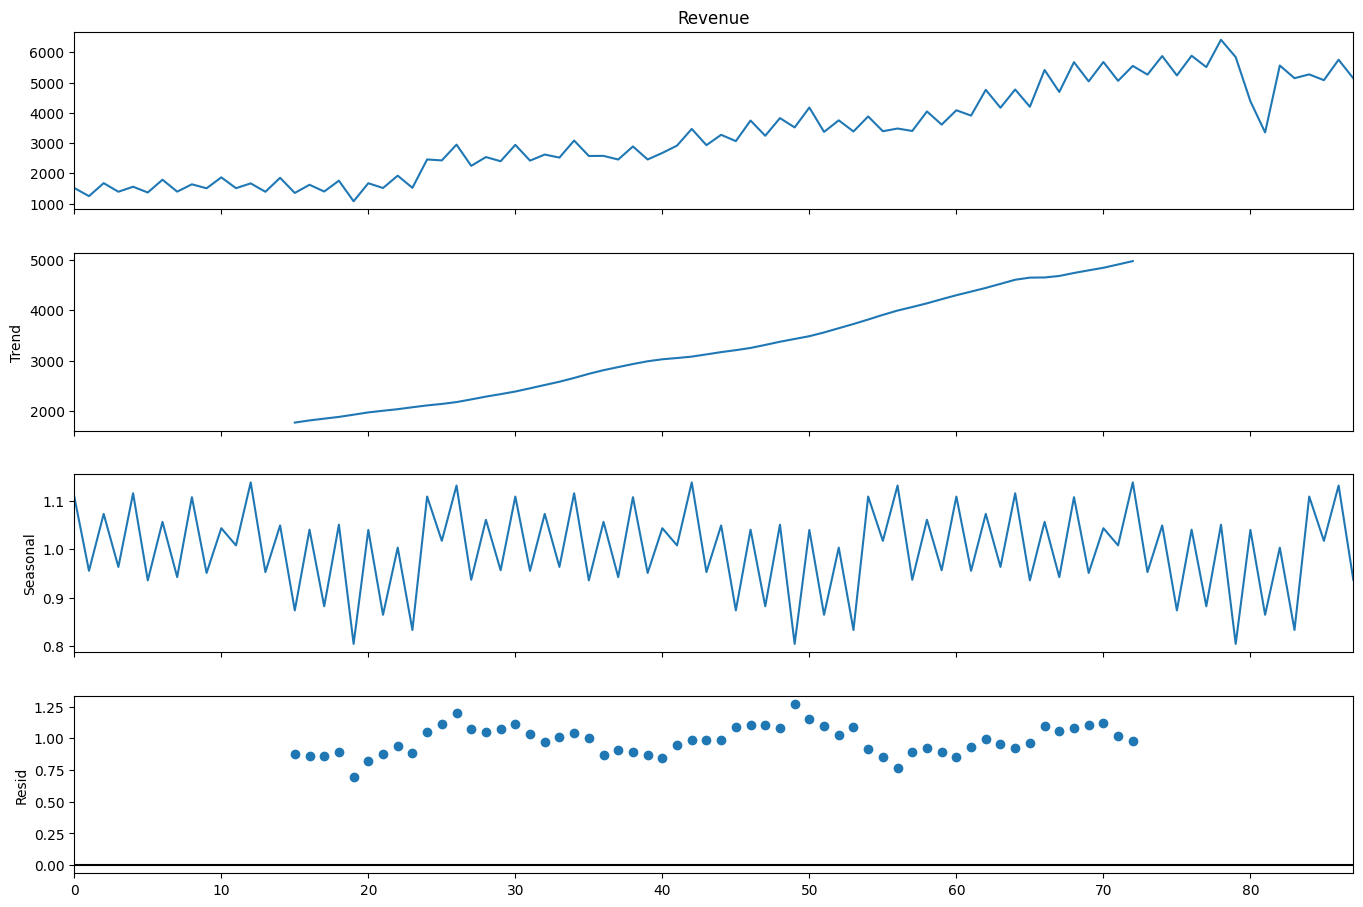

In [8]:
result=seasonal_decompose(df['Revenue'],model='multiplicative',period=30)
fig=result.plot()
fig.set_size_inches(15,10)
fig.show()

Zaman Serisi Grafiği Unsurları
Trend: Zaman serisinin genel eğilimi. Veriler zaman içinde artıyor mu, azalıyor mu, yoksa sabit mi kalıyor? Örneğin, bir şirketin yıllık satış gelirlerini gösteren bir zaman serisi grafiğinde, trend yukarı doğru ise satışlar artıyor demektir.

Mevsimsellik: Belirli zaman dilimlerinde tekrarlayan desenler. Örneğin, mevsimlik etkiler veya aylık değişiklikler olabilir. Bu, satışların her yıl belirli aylarda artıp azaldığı bir grafik olabilir.

Düzensizlik (Noise): Veri üzerinde rastgele dalgalanmalar. Bu, veri toplamada hatalar veya beklenmeyen olaylar gibi faktörlerden kaynaklanabilir.

Dönemsel Dalgalanmalar (Cyclic Patterns): Mevsimsellikten farklı olarak, daha uzun süreli dalgalanmalar olabilir. Örneğin, ekonomik döngüler veya uzun vadeli piyasa trendleri.

Grafiğin Yorumu
Grafikteki unsurlara göre şu adımları izleyerek yorum yapabiliriz:

Trend Analizi:

Veriler zaman içinde sürekli olarak artıyor mu, azalıyor mu, yoksa sabit mi kalıyor? Grafikte belirgin bir artış veya azalma trendi varsa, bu trendin nedenlerine odaklanmak faydalı olabilir.
Trendde bir kırılma noktası var mı? Örneğin, belirli bir tarihten sonra ani bir değişim mevcut mu?

Mevsimsellik Analizi:

Belirli aralıklarla tekrarlayan desenler var mı? Örneğin, her yıl aynı dönemde benzer artışlar veya azalışlar görülebilir.
Mevsimsel etkilerin büyüklüğü nedir? Bu etkiler belirgin mi yoksa hafif mi?
Düzensizlik ve Gürültü:

Veride çok fazla rastgele dalgalanma var mı? Eğer öyleyse, bu dalgalanmaların veri analizini nasıl etkilediğini göz önünde bulundurmak önemlidir.
Düzensizlikleri azaltmak için bir yöntem kullanıldı mı? Örneğin, hareketli ortalama gibi yöntemlerle bu etkiler giderilmiş olabilir.
Dönemsel Dalgalanmalar:

Uzun vadeli döngüler mevcut mu? Bu döngüler mevsimsel etkilerden daha uzun sürelidir ve ekonomik döngüler gibi faktörlerden kaynaklanabilir.

In [9]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Revenue'], order=(1, 1, 1),seasonal_order=(1, 1, 1, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -548.282
Date:                            Mon, 17 Jun 2024   AIC                           1106.564
Time:                                    16:07:17   BIC                           1118.152
Sample:                                         0   HQIC                          1111.191
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7176      0.053     13.636      0.000       0.614       0.821
ma.L1         -0.9981      0.544   

In [10]:
y_pred=model.predict(start=len(df),end=len(df)+20)

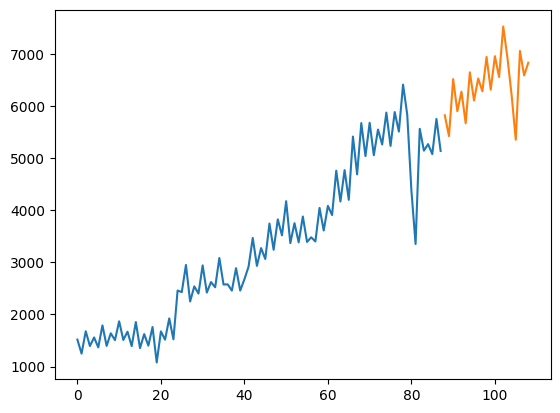

In [11]:
df['Revenue'].plot()
y_pred.plot()
plt.show()

In [12]:
#Corona olmasaydı
df_without_corono=pd.DataFrame(df['Revenue'][:75],columns=['Revenue'])
df_without_corono

,Revenue
0,1517
1,1248
2,1677
3,1393
4,1558
...,...
70,5677
71,5056
72,5548
73,5261


In [13]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_without_corono['Revenue'], order=(1, 1, 1),seasonal_order=(1, 1, 1, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   75
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -420.497
Date:                            Mon, 17 Jun 2024   AIC                            850.993
Time:                                    16:07:34   BIC                            861.629
Sample:                                         0   HQIC                           855.169
                                             - 75                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9994      1.759     -0.568      0.570      -4.446       2.448
ma.L1          0.7009      0.115   

In [14]:
preedictions=model.predict(start=len(df_without_corono),end=len(df_without_corono)+20)
print(preedictions)

75    5152.119702
76    5540.388781
77    5308.158949
78    5836.209979
79    5181.611378
80    5529.992193
81    5318.818620
82    5984.382125
83    5426.888540
84    6003.229705
85    5674.089087
86    6375.299853
87    5697.314527
88    6153.148746
89    5813.478631
90    6560.898378
91    5884.486616
92    6436.058257
93    6090.420287
94    6746.306697
95    6169.535057
Name: predicted_mean, dtype: float64


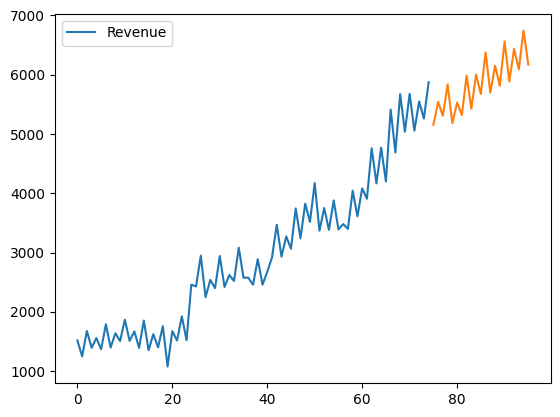

In [15]:
df_without_corono.plot()
preedictions.plot()
plt.show()